In [77]:
from pydataset import data
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn as sk
import sklearn.model_selection as skm

from scipy import stats

import acquire
import prepare

## Acquire

In [78]:
df_iris = data('iris')
df_iris.head(3)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [79]:
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 4

Create a pandas dataframe, df_iris, from this data.

 - print the first 3 rows
 - print the number of rows and columns (shape)
 - print the column names
 - print the data type of each column
 - print the summary statistics for each of the numeric variables

In [80]:
print(df_iris.shape)
print(df_iris.columns)
df_iris.info()

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [81]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [82]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 5.

Read the `Table1_CustDetails` table from your spreadsheet exercises google sheet into a dataframe named `df_google_sheets`.

Make sure that the spreadsheet is publicly visible under your sharing settings.

 - assign the first 100 rows to a new dataframe, `df_google_sheets_sample`
 - print the number of rows of your original dataframe
 - print the first 5 column names
 - print the column names that have a data type of object
 - compute the range for each of the numeric variables

In [83]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1smHXEXnQM-j7YthUAGFsX6Jgkbaw4FvP1XjSDaJGCWI/edit#gid=1023018493'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

df_google_sheets = pd.read_csv(csv_export_url)
df_google_sheets.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [84]:
df_google_sheets_sample = df_google_sheets.iloc[:100,:]
df_google_sheets_sample.shape

(100, 13)

In [85]:
print(df_google_sheets.columns[:5])

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')


In [86]:
for column in df_google_sheets.columns:
    if df_google_sheets[column].dtype == 'O':
        print( column )

customer_id
gender
partner
dependents
payment_type
churn


In [87]:
df_google_sheets.monthly_charges.min()

18.25

In [88]:
for column in df_google_sheets.columns:
    if df_google_sheets[column].dtype == 'float64' or df_google_sheets[column].dtype == 'int64':
        low = df_google_sheets[column].min()
        high = df_google_sheets[column].max()
        gap = high - low
        print(f"{column}: {gap}")
        

is_senior_citizen: 1
phone_service: 2
internet_service: 2
contract_type: 2
monthly_charges: 100.5
total_charges: 8666.0
tenure: 79.3


### 6.

Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

 - assign the first 100 rows to a new dataframe, df_excel_sample
 - print the number of rows of your original dataframe
 - print the first 5 column names
 - print the column names that have a data type of object
 - compute the range for each of the numeric variables.


 - print the column names that have a data type of object


In [89]:
#! pip install openpyxl
df_excel = pd.read_excel('./kalpana_spreadsheet_exercises.xlsx')

 - assign the first 100 rows to a new dataframe, df_excel_sample


In [90]:
df_excel_sample = df_excel.iloc[:100,:]
df_excel_sample.shape

(100, 13)

 - print the number of rows of your original dataframe


In [91]:
len(df_excel)

7049

 - print the first 5 column names


In [92]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

 - compute the range for each of the numeric variables.

In [93]:
for column in df_excel.columns:
    if df_excel[column].dtype == 'O':
        print( column )

customer_id
gender
partner
dependents
payment_type
churn


In [94]:
df_excel.select_dtypes(include='object').columns.tolist()


['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [95]:
df_excel.select_dtypes(include=['object','float64']).columns.tolist()

['customer_id',
 'gender',
 'is_senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'internet_service',
 'contract_type',
 'payment_type',
 'monthly_charges',
 'total_charges',
 'churn',
 'tenure']

In [96]:
for column in df_excel.columns:
    if df_excel[column].dtype == 'float64' or df_excel[column].dtype == 'int64':
        low = df_excel[column].min()
        high = df_excel[column].max()
        gap = high - low
        print(f"{column}: {gap}")

is_senior_citizen: 1.0
phone_service: 2.0
internet_service: 2.0
contract_type: 2.0
monthly_charges: 100.5
total_charges: 8666.0
tenure: 79.34177215


### 7
Read the data from this google sheet into a dataframe, df_google.
https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357

 - print the first 3 rows
 - print the number of rows and columns
 - print the column names
 - print the data type of each column
 - print the summary statistics for each of the numeric variables
 - print the unique values for each of your categorical variables

In [97]:
def read_google(url):
    csv_export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')
    return pd.read_csv(csv_export_url)

In [98]:
df_google = read_google("https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357")
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [99]:
print(df_google.shape)
print(df_google.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [100]:
for column in df_google.columns:
    print(f"{column} \t| dtype: {df_google[column].dtype}")

PassengerId 	| dtype: int64
Survived 	| dtype: int64
Pclass 	| dtype: int64
Name 	| dtype: object
Sex 	| dtype: object
Age 	| dtype: float64
SibSp 	| dtype: int64
Parch 	| dtype: int64
Ticket 	| dtype: object
Fare 	| dtype: float64
Cabin 	| dtype: object
Embarked 	| dtype: object


In [101]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
# print the unique values for each of your categorical variables
df_google.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:

temp = df_google[['Survived','Sex','Ticket','Cabin','Embarked']]
for column in temp:
    print(f"\n{column}: \n --------------")
    print(temp[column].unique())


Survived: 
 --------------
[0 1]

Sex: 
 --------------
['male' 'female']

Ticket: 
 --------------
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734

## Acquire.py

Make a new python module, `acquire.py` to hold the following data aquisition functions:


In [104]:
import acquire


7. Make a function named `get_titanic_data` that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the _Codeup Data Science Database_. 



In [105]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1



8. Make a function named `get_iris_data` that returns the data from the `iris_db` on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the `species_id`s. Obtain your data from the _Codeup Data Science Database_. 


In [106]:
df = acquire.get_iris_data()
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa



9. Make a function named `get_telco_data` that returns the data from the `telco_churn` database in SQL. In your SQL, be sure to join all 4 tables together, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the _Codeup Data Science Database_. 


In [107]:
df = acquire.get_telco_data()
df.head()

,contract_type_id,payment_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,DSL,Mailed check,One year
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,DSL,Mailed check,Month-to-month
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Electronic check,Month-to-month
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Electronic check,Month-to-month
4,1,2,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Mailed check,Month-to-month



10. Once you've got your `get_titanic_data`, `get_iris_data`, and `get_telco_data` functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of `telco.csv`, `titanic.csv`, or `iris.csv`. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name. 

## Prepare Exercises

### Iris Data

Use the function defined in acquire.py to load the iris data.

In [108]:
iris = acquire.get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa



Drop the species_id and measurement_id columns.


In [109]:
iris = iris.drop(columns=['species_id','measurement_id'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Rename the species_name column to just species.


In [110]:
iris = iris.rename(columns={'species_name' : 'species'})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).


In [111]:
dummy = pd.get_dummies(iris.species, drop_first= True)
iris = pd.concat([iris, dummy], axis= 1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0



Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [112]:
def prep_iris(iris):
    iris = iris.drop(columns=['species_id','measurement_id'])
    iris = iris.rename(columns={'species_name' : 'species'})
    dummy = pd.get_dummies(iris.species, drop_first= False)
    iris = pd.concat([iris, dummy], axis= 1)
    return iris

In [113]:
iris = prep_iris(acquire.get_iris_data())
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


### Titanic Data

Use the function defined in acquire.py to load the Titanic data.

Drop any unnecessary, unhelpful, or duplicated columns.

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [114]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [115]:
def prep_titanic(df):
    '''
    This function will clean the data...
    '''
    df = df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    df = df.drop(columns=cols_to_drop)
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [116]:
df = prep_titanic(df)
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


### Telco Data

Use the function defined in acquire.py to load the Telco data.


In [117]:
df = acquire.get_telco_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   contract_type_id          7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup


Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.


In [118]:
cols_to_drop = ['contract_type_id',
                'payment_type_id',
                'internet_service_type_id',
                'phone_service'                
                ]
df = df.drop(columns=cols_to_drop)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
0,0002-ORFBO,Female,0,Yes,Yes,9,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,DSL,Mailed check,One year
1,0003-MKNFE,Male,0,No,No,9,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,DSL,Mailed check,Month-to-month
2,0004-TLHLJ,Male,0,No,No,4,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Electronic check,Month-to-month
3,0011-IGKFF,Male,1,Yes,No,13,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Electronic check,Month-to-month
4,0013-EXCHZ,Female,1,Yes,No,3,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Mailed check,Month-to-month



Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.


In [119]:
cols = ['partner',
        'dependents',
        'online_security',
        'online_backup',
        'device_protection', 
        'tech_support', 
        'streaming_tv',
        'streaming_movies',
        'paperless_billing',
        'churn'
        ]


df[cols] = df[cols]  == 'Yes'

In [120]:
df.multiple_lines = df.multiple_lines.replace({'No': '1', 'Yes':'2+', 'No phone service': 'None'})
df = df.rename(columns={'multiple_lines':'phone_lines'})
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
0,0002-ORFBO,Female,0,True,True,9,1,False,True,False,True,True,False,True,65.6,593.3,False,DSL,Mailed check,One year
1,0003-MKNFE,Male,0,False,False,9,2+,False,False,False,False,False,True,False,59.9,542.4,False,DSL,Mailed check,Month-to-month
2,0004-TLHLJ,Male,0,False,False,4,1,False,False,True,False,False,False,True,73.9,280.85,True,Fiber optic,Electronic check,Month-to-month
3,0011-IGKFF,Male,1,True,False,13,1,False,True,True,False,True,True,True,98.0,1237.85,True,Fiber optic,Electronic check,Month-to-month
4,0013-EXCHZ,Female,1,True,False,3,1,False,False,False,True,True,False,True,83.9,267.4,True,Fiber optic,Mailed check,Month-to-month


In [121]:
dummies = pd.get_dummies(df[['gender', 'internet_service_type', 'payment_type', 'contract_type']], drop_first=False)
df = pd.concat([df, dummies], axis=1)

In [122]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type,gender_Female,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,0002-ORFBO,Female,0,True,True,9,1,False,True,False,True,True,False,True,65.6,593.3,False,DSL,Mailed check,One year,1,0,1,0,0,0,0,0,1,0,1,0
1,0003-MKNFE,Male,0,False,False,9,2+,False,False,False,False,False,True,False,59.9,542.4,False,DSL,Mailed check,Month-to-month,0,1,1,0,0,0,0,0,1,1,0,0
2,0004-TLHLJ,Male,0,False,False,4,1,False,False,True,False,False,False,True,73.9,280.85,True,Fiber optic,Electronic check,Month-to-month,0,1,0,1,0,0,0,1,0,1,0,0
3,0011-IGKFF,Male,1,True,False,13,1,False,True,True,False,True,True,True,98.0,1237.85,True,Fiber optic,Electronic check,Month-to-month,0,1,0,1,0,0,0,1,0,1,0,0
4,0013-EXCHZ,Female,1,True,False,3,1,False,False,False,True,True,False,True,83.9,267.4,True,Fiber optic,Mailed check,Month-to-month,1,0,0,1,0,0,0,0,1,1,0,0



Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [123]:
def prep_telco(df):
    cols_to_drop = ['contract_type_id',
                'payment_type_id',
                'internet_service_type_id',
                'phone_service'                
                ]
    df = df.drop(columns=cols_to_drop)
    cols_to_bool = ['partner',
        'dependents',
        'online_security',
        'online_backup',
        'device_protection', 
        'tech_support', 
        'streaming_tv',
        'streaming_movies',
        'paperless_billing',
        'churn'
        ]
    df[cols_to_bool] = df[cols_to_bool]  == 'Yes'
    df.senior_citizen = df.senior_citizen == 1
    df.multiple_lines = df.multiple_lines.replace({'No': '1', 'Yes':'2+', 'No phone service': 'None'})
    df = df.rename(columns={'multiple_lines':'phone_lines'})
    dummies = pd.get_dummies(df[['gender', 'internet_service_type', 'payment_type', 'contract_type', 'phone_lines']], drop_first=False)
    df = pd.concat([df, dummies], axis=1)
    return df

In [124]:
df = acquire.get_telco_data()
df = prep_telco(df)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type,gender_Female,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,phone_lines_1,phone_lines_2+,phone_lines_None
0,0002-ORFBO,Female,False,True,True,9,1,False,True,False,True,True,False,True,65.6,593.3,False,DSL,Mailed check,One year,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0
1,0003-MKNFE,Male,False,False,False,9,2+,False,False,False,False,False,True,False,59.9,542.4,False,DSL,Mailed check,Month-to-month,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0
2,0004-TLHLJ,Male,False,False,False,4,1,False,False,True,False,False,False,True,73.9,280.85,True,Fiber optic,Electronic check,Month-to-month,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
3,0011-IGKFF,Male,True,True,False,13,1,False,True,True,False,True,True,True,98.0,1237.85,True,Fiber optic,Electronic check,Month-to-month,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
4,0013-EXCHZ,Female,True,True,False,3,1,False,False,False,True,True,False,True,83.9,267.4,True,Fiber optic,Mailed check,Month-to-month,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0


## Exploratory Data Analysis Exercises


Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

#### Section 1 - iris_db: 
Using iris data from our mySQL server and the methods used in the lesson above:

##### 1. Acquire, prepare & split your data.


In [125]:
## First I need to make a generic splitting function.
def train_validate_test_split(df, seed=123, stratify=None):
    # if stratify:
    train_and_validate, test = skm.train_test_split(
        df, 
        test_size=0.2, 
        random_state=seed, 
        stratify=( df[stratify] if stratify else None)
    )
    train, validate = skm.train_test_split(
        train_and_validate,
        test_size=0.3,
        random_state=seed,
        stratify= (train_and_validate[stratify] if stratify else None)
    )
    return train, validate, test

In [126]:
df = acquire.get_iris_data()
df = prepare.prep_iris(df)
train, validate, test = prepare.train_validate_test_split(df)

In [127]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
56,6.3,3.3,4.7,1.6,versicolor,0,1,0
40,5.0,3.5,1.3,0.3,setosa,1,0,0
70,5.9,3.2,4.8,1.8,versicolor,0,1,0
23,5.1,3.3,1.7,0.5,setosa,1,0,0
139,6.9,3.1,5.4,2.1,virginica,0,0,1



2. Univariate Stats
 - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
 - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
 - Document takeaways & any actions.



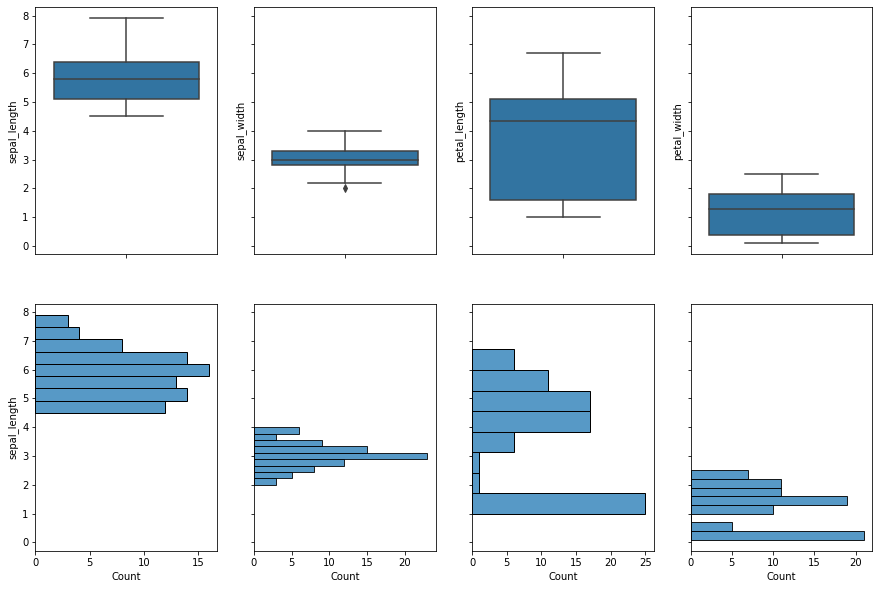

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.841667,3.028571,3.804762,1.211905
std,0.813324,0.428101,1.718777,0.732450
min,4.500000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.375000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.700000,2.500000


In [128]:
# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
features = list(train.columns)[:4]

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(15,10), sharey='row')
# fig, [row1,row2] = plt.subplots(ncols=4, nrows=2, figsize=(15,10))
# list(axs)


for i, feature in enumerate(features):
    sns.boxplot(data=train, y=feature, ax=axs[0][i])
    # print(feature)
    sns.histplot(data=train, y=feature, ax = axs[1][i])


plt.show()
train[features].describe()

versicolor    31
virginica     27
setosa        26
Name: species, dtype: int64

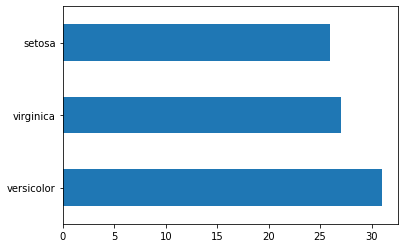

In [129]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
freq_t = train.species.value_counts()
freq_t.plot.barh()
freq_t

My takeaways:  
I feel like I prefer histograms over boxplots because histograms seem to illustrate the distribution clearly while boxplots abstract and obscure the distribution.  
Also, there is an interesting distribution of petal lengths

##### 3. Bivariate Stats



 - Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).


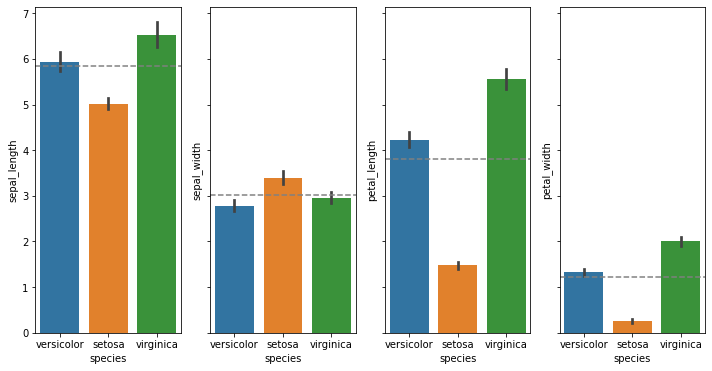

In [130]:
features = list(train.columns)[:4]

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(12,6), sharey='row')
# fig, [row1,row2] = plt.subplots(ncols=4, nrows=2, figsize=(15,10))
# list(axs)


for i, feature in enumerate(features):
    sns.barplot(data=train, y=feature, x='species', ax=axs[i])
    axs[i].axhline(train[feature].mean(), ls='--', color='grey')


plt.show()


 - For each measurement type, compute the descriptive statistics for each species.


In [131]:

pd.options.display.max_columns = 0
pd.options.display.max_rows = 100 #The output will be long
train.groupby('species')[features].describe().T

species                setosa  versicolor  virginica
sepal_length count  26.000000   31.000000  27.000000
             mean    5.011538    5.938710   6.529630
             std     0.326591    0.531462   0.700996
             min     4.500000    4.900000   4.900000
             25%     4.800000    5.550000   6.050000
             50%     5.000000    5.900000   6.400000
             75%     5.100000    6.250000   7.000000
             max     5.800000    7.000000   7.900000
sepal_width  count  26.000000   31.000000  27.000000
             mean    3.396154    2.787097   2.951852
             std     0.364945    0.336395   0.340102
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.550000   2.750000
             50%     3.450000    2.800000   3.000000
             75%     3.675000    3.000000   3.200000
             max     4.000000    3.400000   3.800000
petal_length count  26.000000   31.000000  27.000000
             mean    1.480769    4.232258   5.551852
             std     0.191873    0.505560   0.558411
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.300000   5.600000
             75%     1.600000    4.550000   5.900000
             max     1.900000    5.100000   6.700000
petal_width  count  26.000000   31.000000  27.000000
             mean    0.261538    1.322581   2.000000
             std     0.116883    0.210887   0.292206
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.200000
             max     0.600000    1.800000   2.500000


 - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.


In [132]:
# Mann-Whitney U test does not require normal distribution.  Compares the sums between populations.
# Needs 1 ordinal and 1 metric variable
# Useful for when t-test does not apply

versicolor = train[train.versicolor == 1]
virginica = train[train.virginica == 1]
for feature in features:
    u, p = stats.mannwhitneyu(x=versicolor[feature], y=virginica[feature])
    print(f"{feature}: {u}, {p}")

sepal_length: 207.0, 0.000988539633663003
sepal_width: 310.0, 0.09070085497990887
petal_length: 19.5, 4.850587232607816e-10
petal_width: 24.5, 7.377958838160176e-10



 - Document takeaways & any actions.



In [ ]:
# sepal_width does not seem to be statistically significant.

#### 4. Multivariate Stats



 - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.


In [141]:
from itertools import combinations
combos = list(combinations(features,2))


In [142]:
list(enumerate(combos))

[(0, ('sepal_length', 'sepal_width')),
 (1, ('sepal_length', 'petal_length')),
 (2, ('sepal_length', 'petal_width')),
 (3, ('sepal_width', 'petal_length')),
 (4, ('sepal_width', 'petal_width')),
 (5, ('petal_length', 'petal_width'))]

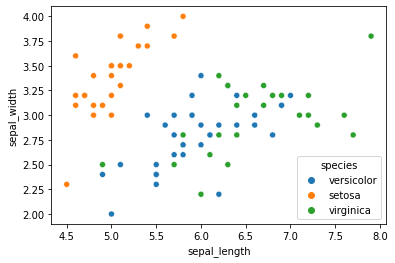

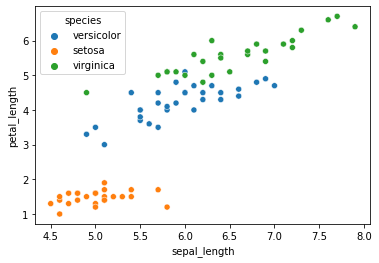

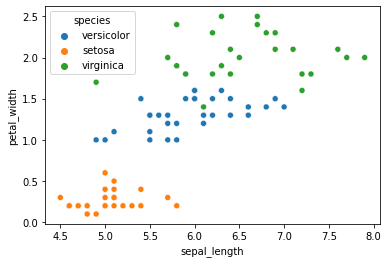

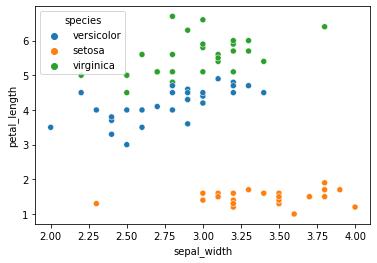

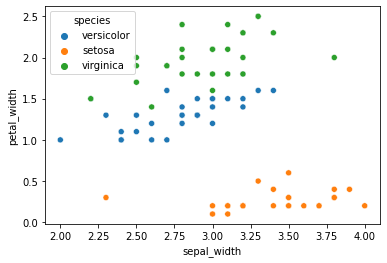

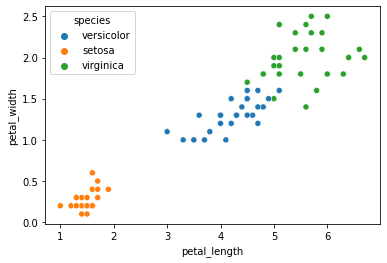

In [150]:
for i, (x, y) in enumerate(combos):
    # fig, ax = plt.subplots(1,1, figsize=(6,5))
    ax = sns.scatterplot(data = train, x=x, y=y, hue='species')
    plt.show()


 - Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col


In [156]:
relplot = train[features+['species']].groupby('species').mean()

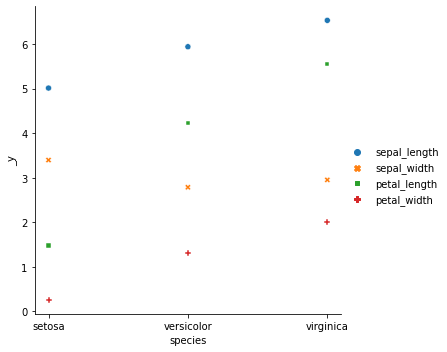

In [157]:
sns.relplot(data=relplot)


 - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.


c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='variable', ylabel='value'>

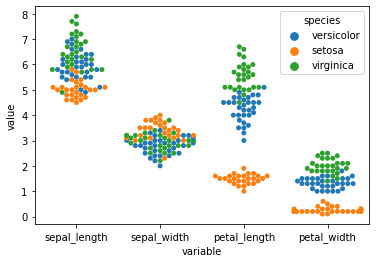

In [166]:
melted = pd.melt(train[features+['species']], id_vars='species')
sns.swarmplot(data = melted, x='variable', y='value', hue='species')


 - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).



 - Document takeaways and any actions.



### Exercises Part II
Explore your titanic dataset more completely.

Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

### Exercises Part III
Explore your telco data to discover drivers of churn
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.